In [9]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import sys
import os
from torchvision.datasets import ImageFolder
from augmentations import augmentations as A
from augmentations.TSKinFace_Dataset import TSKinDataset
import matplotlib.pyplot as plt

In [92]:
[d.name for d in os.scandir('../dataset/TSKinFace_Data/TSKinFace_cropped/FMSD/') if d.is_dir()]

['FMSD-F', 'FMSD-M', 'FMSD-C']

In [101]:
class TSKinDataset(ImageFolder):
    def __init__(self, root, transform=None):
        super(TSKinDataset, self).__init__(root)
        self.data = ImageFolder(root, transform)
        self.root = root
        self.data.classes, self.data.class_to_idx = self._find_classes(root)
    
    def _find_classes(self, image):
        if sys.version_info >= (3, 5):
            classes = [d.name for d in os.scandir(self.root) if d.is_dir()]
        else:
            classes = [d for d in os.listdir(self.root) if os.path.isdir(os.path.join(self.root, d))]
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

In [105]:
default_dataset = TSKinDataset(
    root = '../dataset/TSKinFace_Data/TSKinFace_cropped/FMSD/',
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
)

In [106]:
default_dataset.class_to_idx

{'FMSD-C': 0, 'FMSD-F': 1, 'FMSD-M': 2}

In [107]:
default_dataset

Dataset TSKinDataset
    Number of datapoints: 912
    Root location: ../dataset/TSKinFace_Data/TSKinFace_cropped/FMSD/

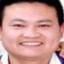

In [110]:
default_dataset[456][0]

In [29]:
import numpy as np

In [30]:
alpha= 0.2
min_lam=0
max_lam=1

In [36]:
lam = np.clip(np.random.beta(alpha, alpha), min_lam, max_lam) 

In [37]:
lam

0.8720264275108531

In [38]:
default_dataset

Dataset ImageFolder
    Number of datapoints: 2589
    Root location: ../dataset/TSKinFace_Data/TSKinFace_cropped
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [46]:
from pathlib import Path

# Path("path/to/current/file.foo").rename("path/to/new/destination/for/file.foo")

In [48]:
Path("../dataset/TSKinFace_Data/TSKinFace_cropped/FMSD/FMSD-1-D.jpg").rename("../dataset/TSKinFace_Data/TSKinFace_cropped/FMSD/FMSD-C/FMSD-1-D.jpg")

PosixPath('../dataset/TSKinFace_Data/TSKinFace_cropped/FMSD/FMSD-C/FMSD-1-D.jpg')

In [68]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('../dataset/TSKinFace_Data/TSKinFace_cropped/FMS') if isfile(join('../dataset/TSKinFace_Data/TSKinFace_cropped/FMS', f))]

In [54]:
onlyfiles[0].split(".")[0][-1]

'S'

In [70]:
for f in onlyfiles:
    if f.split('.')[0][-1] == 'S':
        Path("../dataset/TSKinFace_Data/TSKinFace_cropped/FMS/"+f).rename("../dataset/TSKinFace_Data/TSKinFace_cropped/FMS/FMS-C/"+f)
    elif f.split('.')[0][-1] == 'D':
        Path("../dataset/TSKinFace_Data/TSKinFace_cropped/FMS/"+f).rename("../dataset/TSKinFace_Data/TSKinFace_cropped/FMS/FMS-C/"+f)
    elif f.split('.')[0][-1] == 'F':
        Path("../dataset/TSKinFace_Data/TSKinFace_cropped/FMS/"+f).rename("../dataset/TSKinFace_Data/TSKinFace_cropped/FMS/FMS-F/"+f)
    elif f.split('.')[0][-1] == 'M':
        Path("../dataset/TSKinFace_Data/TSKinFace_cropped/FMS/"+f).rename("../dataset/TSKinFace_Data/TSKinFace_cropped/FMS/FMS-M/"+f)

In [2]:
default_dataset = ImageFolder(
    root = '../dataset/TSKinFace_Data/TSKinFace_cropped/FMSD/',
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
)

In [3]:
dataset = TSKinDataset(
    root = '../dataset/TSKinFace_Data/TSKinFace_cropped/FMSD/',
    transform = [
        transforms.ToTensor(),
        A.MixUp(dataset=default_dataset)
    ]
)

TypeError: Invalid shape (3, 64, 64) for image data

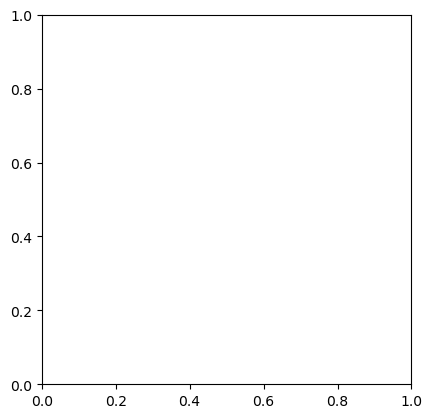

In [10]:
plt.imshow(dataset[451][0])